<a href="https://colab.research.google.com/github/tmdcks1103/Machine-Learning-Programming/blob/main/9%EC%A3%BC%EC%B0%A8/TSLA_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# TSLA.csv 예측. Adj Close는 drop.
# Open, High, Low, Close를 가지고(예를 들어 window size 5) 그 다음 6번째 close 예측

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/9주차/TSLA.csv')
df




,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [6]:
# 설정
window = 5
features = ['Open','High','Low','Close']

# 전처리
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date').reset_index(drop=True)

# Adj Close 제거
if 'Adj Close' in df.columns:
    df = df.drop(columns=['Adj Close'])

In [7]:
# feature 배열
data = df[features].values.astype(float)
dates = df['Date'].reset_index(drop=True)

In [8]:
# 시퀀스 생성

X_list, y_list = [], []
for i in range(len(data) - window):
    X_list.append(data[i:i+window])
    y_list.append(data[i+window, features.index('Close')])

X = np.array(X_list)
y = np.array(y_list).reshape(-1, 1)

In [9]:
# Train/test 분할
split_point = int(len(X) * 0.8)
X_train, y_train = X[:split_point], y[:split_point]
X_test, y_test = X[split_point:], y[split_point:]

In [10]:
# 스케일링

n_features = X.shape[2]
feature_scaler = MinMaxScaler()
feature_scaler.fit(X_train.reshape(-1, n_features))

X_train_s = feature_scaler.transform(X_train.reshape(-1, n_features)).reshape(X_train.shape)
X_test_s  = feature_scaler.transform(X_test.reshape(-1, n_features)).reshape(X_test.shape)

target_scaler = MinMaxScaler()
target_scaler.fit(y_train)
y_train_s = target_scaler.transform(y_train)
y_test_s  = target_scaler.transform(y_test)

In [11]:
# LSTM 모델 구성
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window, n_features)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 6) 학습 (validation_split으로 검증 사용)
history = model.fit(X_train_s, y_train_s,
                    epochs=50, batch_size=8,
                    validation_split=0.1, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


266/266 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0363 - val_loss: 0.0015
Epoch 2/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 7.3543e-04 - val_loss: 0.0018
Epoch 3/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.1216e-04 - val_loss: 0.0013
Epoch 4/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.5158e-04 - val_loss: 0.0015
Epoch 5/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.2577e-04 - val_loss: 0.0017
Epoch 6/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.5993e-04 - val_loss: 0.0011
Epoch 7/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.9196e-04 - val_loss: 0.0011
Epoch 8/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.7184e-04 - val_loss: 0.0015
Epoch 9/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.4471e-04 - val_loss: 0.0010
Epoch 10/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.5400e-04 - val_loss: 0.0011
Epoch 11/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.6738e-04 - val_loss: 0.0012
Epoch 12/50
266/266 ━━━

In [12]:
# 예측 및 평가
pred_s = model.predict(X_test_s)
pred = target_scaler.inverse_transform(pred_s)
y_test_orig = target_scaler.inverse_transform(y_test_s)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_orig, pred)
print(f"Test MSE (원래 스케일): {mse:.6f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Test MSE (원래 스케일): 163410.052907


         Date  TrueClose  PredClose
0  2019-11-19  71.903999  70.221359
1  2019-11-20  70.444000  72.174110
2  2019-11-21  70.966003  70.647400
3  2019-11-22  66.608002  71.803108
4  2019-11-25  67.267998  67.027695
5  2019-11-26  65.783997  67.509460
6  2019-11-27  66.258003  66.786751
7  2019-11-29  65.987999  67.056664
8  2019-12-02  66.973999  66.527794
9  2019-12-03  67.239998  67.497498
10 2019-12-04  66.606003  67.679390
11 2019-12-05  66.073997  66.980492
12 2019-12-06  67.178001  66.593376
13 2019-12-09  67.905998  67.887047
14 2019-12-10  69.767998  68.652374
15 2019-12-11  70.540001  70.223381
16 2019-12-12  71.935997  70.950142
17 2019-12-13  71.678001  72.403152
18 2019-12-16  76.300003  71.968170
19 2019-12-17  75.797997  76.633904


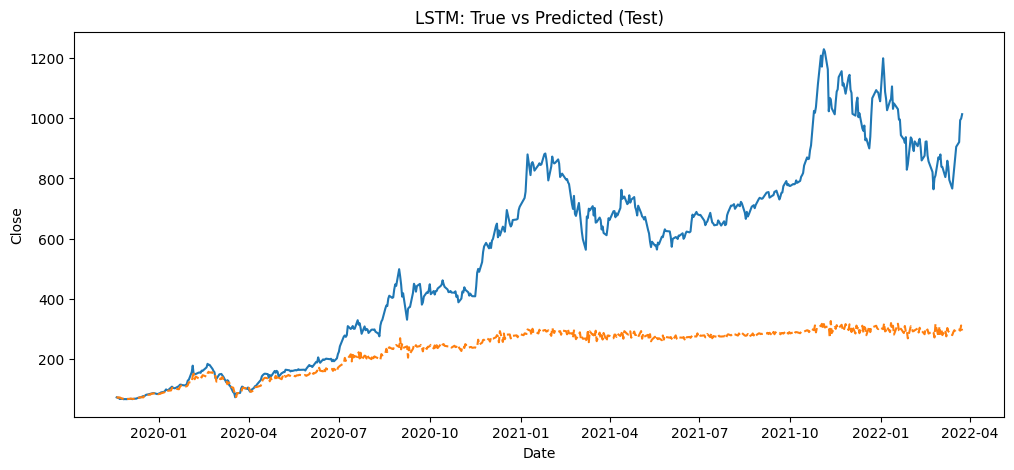

In [13]:
#시각화
date_test = dates.iloc[split_point + window : split_point + window + len(y_test)].reset_index(drop=True)
results_df = pd.DataFrame({'Date': date_test, 'TrueClose': y_test_orig.flatten(), 'PredClose': pred.flatten()})
print(results_df.head(20))

plt.figure(figsize=(12,5))
plt.plot(results_df['Date'], results_df['TrueClose'])
plt.plot(results_df['Date'], results_df['PredClose'], linestyle='--')
plt.xlabel('Date'); plt.ylabel('Close'); plt.title('LSTM: True vs Predicted (Test)')
plt.show()

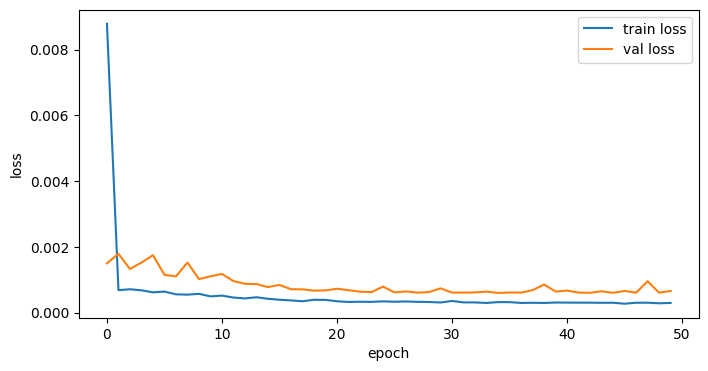

In [14]:
# 학습 손실 시각화
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('epoch'); plt.ylabel('loss'); plt.legend(); plt.show()